# Match Kitti Sequence version 22-11

Reads a sequence of stereo images as Frame. The Frames are scanned to identify FramePoints that are pixels that are at the top or botrom of vertical lines in the image. A patch is taken around each of the FramePoints in the left hand image, to match these to a patch in the right hand image and estimate the disparity/distance of the framePoint.

A Sequence is created in which the first Frame is the KeyFrame. It's initial FramePoints are culled to keep only the points for which there is a confident estimate of its depth. The consecutive frames are used to track the KeyFrame's remaining FramePoints. Only a limited number of all framePoints will be found in the consecutive frames, mostly because nearby objects become larger quickly as we get closer. The matching FramePoints are given the same FramePointId as the corresponding point in the KeyFrame and its depth is estimated.

The results are dumped into a folder 'dump', containing files 0.txt, 1.txt, etc. 0.txt contains the FramePoints as observed from the first frame, 1.txt form the second frame, etc. In these files, each row contains a single FramePoint with the values FramePointID, X, Y, Depth.

In [1]:
# when you change a setting you have to restart the kernel (settings are only loaded once)
import os
#os.environ['STEREO_CONFIDENCE'] = '1.6'
#os.environ['SEQUENCE_CONFIDENCE'] = '1.6'
#os.environ['PATCH_SIZE'] = '17'

import sys
sys.path.append('..')
from src.zed import *
%matplotlib inline
import numpy as np
import glob

Read the frames for KITTI sequence 00.

In [26]:
%%time
LEFTDIR = '/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left'
RIGHTDIR = '/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/right'

frame = []
for filename in sorted(glob.glob(LEFTDIR + '/*')):
    left_frame = Frame(filename, RIGHTDIR)
    frame.append(left_frame)

CPU times: user 1.33 s, sys: 116 ms, total: 1.45 s
Wall time: 1.44 s


In [27]:
frame[0]._filepath
frame[1].get_right_frame()._filepath

'/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/right/000002.png'

Turn the list of frames into a sequence. The first frame is automatically taken as the KeyFrame and its FramePoints are rerieved, depth is estimated, only the most confident points are kept, and they are tracked in the other frames.

In [28]:
seq = Sequence()
for f in ProgressBar()(frame[::120]):
    print(f._filepath)
    seq.add_frame(f)

N/A% (0 of 175) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/000001.png


  0% (1 of 175) |                         | Elapsed Time: 0:00:06 ETA:  0:17:45

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/000121.png


  1% (2 of 175) |                         | Elapsed Time: 0:00:08 ETA:  0:12:07

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/000241.png


  1% (3 of 175) |                         | Elapsed Time: 0:00:17 ETA:  0:16:46

42929 43049 26 1.79174628929 0.24794385675 [[ 0.96616705  0.07102871  0.24794386 -0.65249148]
 [-0.15502224  0.9282302   0.33816682 -0.10888976]
 [-0.20612943 -0.36516244  0.90783647  1.79174629]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/000361.png


  2% (4 of 175) |                         | Elapsed Time: 0:00:25 ETA:  0:17:50

43049 43169 64 1.05581180992 0.232896680368 [[ 0.97081899  0.05718071  0.23289668 -2.29750097]
 [-0.09224051  0.98548085  0.14254537  1.45504608]
 [-0.22136437 -0.15986826  0.9619979   1.05581181]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/000481.png


  2% (5 of 175) |                         | Elapsed Time: 0:00:31 ETA:  0:18:00

43169 43289 32 0.928844408713 0.287759128576 [[ 0.8826225   0.37171523  0.28775913 -0.10011279]
 [-0.42125138  0.89710463  0.13323121 -0.10713088]
 [-0.20862598 -0.23881179  0.94839028  0.92884441]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/000601.png


  3% (6 of 175) |                         | Elapsed Time: 0:00:37 ETA:  0:17:29

43289 43409 8 0.000309721609558 0.106342543288 [[  9.91496383e-01   7.50079101e-02   1.06342543e-01   6.55600762e-04]
 [ -9.43428066e-02   9.77167147e-01   1.90378049e-01   1.56952836e-03]
 [ -8.96345800e-02  -1.98791801e-01   9.75934148e-01   3.09721610e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/000721.png


  4% (7 of 175) |#                        | Elapsed Time: 0:00:44 ETA:  0:17:52

43409 43529 46 1.56734503625 0.0353968275886 [[ 0.87841235 -0.47659083 -0.03539683  1.07534049]
 [ 0.47742719  0.87182053  0.10950909  2.90385542]
 [-0.02133135 -0.11309355  0.99335534  1.56734504]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/000841.png


  4% (8 of 175) |#                        | Elapsed Time: 0:00:50 ETA:  0:17:32

43529 43649 8 -0.898638208323 0.789708813764 [[ 0.59101243 -0.1645123  -0.78970881  6.90683659]
 [ 0.25529548  0.96680774 -0.01034428  3.83686806]
 [ 0.76519836 -0.19549549  0.61339464 -0.89863821]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/000961.png


  5% (9 of 175) |#                        | Elapsed Time: 0:00:55 ETA:  0:16:56

43649 43769 4 9.38541067918 0.34334727022 [[ -0.78525106   0.51526054   0.34334727  -5.38010519]
 [ -0.25434277  -0.77400357   0.5798519  -10.88485381]
 [  0.56452682   0.36800142   0.73883992   9.38541068]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/001081.png


  5% (10 of 175) |#                       | Elapsed Time: 0:01:03 ETA:  0:17:38

43769 43889 57 0.00224768199959 0.145038758046 [[ 0.96764423 -0.20646645 -0.14503876 -0.02211004]
 [ 0.24181111  0.92298273  0.29938314  0.06820813]
 [ 0.0720557  -0.32476835  0.9430448   0.00224768]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/001201.png


  6% (11 of 175) |#                       | Elapsed Time: 0:01:15 ETA:  0:20:20

43889 44009 23 5.33867737664 0.300119116945 [[ 0.7887557   0.53646338  0.30011912  0.98994032]
 [-0.6138677   0.71292013  0.33898575 -2.55563654]
 [-0.03210752 -0.45161038  0.89163736  5.33867738]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/001321.png


  6% (12 of 175) |#                       | Elapsed Time: 0:01:27 ETA:  0:21:08

44009 44129 36 -1.51684644293 0.0912932164107 [[ 0.99544247 -0.02756509  0.09129322  0.67826886]
 [ 0.00534777  0.97194256  0.23515752 -0.3268185 ]
 [-0.0952139  -0.23359757  0.96766032 -1.51684644]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/001441.png


  7% (13 of 175) |#                       | Elapsed Time: 0:01:39 ETA:  0:22:17

44129 44249 20 -0.00317165337156 0.301325078908 [[ 0.95351912  0.00211738 -0.30132508 -0.03388921]
 [ 0.18388006  0.78812151  0.58741179  0.0744187 ]
 [ 0.23872455 -0.61551605  0.75109958 -0.00317165]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/001561.png


  8% (14 of 175) |#                       | Elapsed Time: 0:01:49 ETA:  0:23:13

44249 44369 39 1.35684786827 0.181116303115 [[ 0.87677487 -0.44549155  0.1811163  -1.28449436]
 [ 0.41832506  0.89230274  0.16970552  1.06336522]
 [-0.23721295 -0.07302804  0.96870889  1.35684787]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/001681.png


  8% (15 of 175) |##                      | Elapsed Time: 0:01:59 ETA:  0:24:21

44369 44489 31 0.000318868678721 0.119299121081 [[  9.92508637e-01   2.63500335e-02   1.19299121e-01   3.95961031e-05]
 [ -5.09994491e-02   9.76677367e-01   2.08567441e-01   1.65070840e-04]
 [ -1.11020992e-01  -2.13089176e-01   9.70704560e-01   3.18868679e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/001801.png


  9% (16 of 175) |##                      | Elapsed Time: 0:02:09 ETA:  0:24:52

44489 44609 16 0.56675051581 0.060903401264 [[ 0.97459738 -0.21552429  0.0609034   0.36642217]
 [ 0.18951869  0.9385307   0.28851826 -0.40455159]
 [-0.11934241 -0.26964681  0.95553545  0.56675052]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/001921.png


  9% (17 of 175) |##                      | Elapsed Time: 0:02:18 ETA:  0:25:49

44609 44729 13 7.12940411717 0.0898097066713 [[ 0.65595517 -0.74943781  0.08980971 -2.08136108]
 [ 0.72460085  0.65855698  0.20311651  2.79160612]
 [-0.211368   -0.06815913  0.97502713  7.12940412]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/002041.png


 10% (18 of 175) |##                      | Elapsed Time: 0:02:28 ETA:  0:27:07

44729 44849 34 19.9491235408 0.134605203255 [[  0.98612639  -0.09714003   0.1346052    0.56153486]
 [  0.08111922   0.98947973   0.11978951  13.25766052]
 [ -0.14482548  -0.10720853   0.983632    19.94912354]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/002161.png


 10% (19 of 175) |##                      | Elapsed Time: 0:02:37 ETA:  0:27:02

44849 44969 34 0.0101248497278 0.0512652290515 [[ 0.98763213  0.14817103  0.05126523  0.01063494]
 [-0.15633893  0.95542332  0.25044844  0.13403484]
 [-0.01187079 -0.25536567  0.96677167  0.01012485]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/002281.png


 11% (20 of 175) |##                      | Elapsed Time: 0:02:47 ETA:  0:26:24

44969 45089 35 0.536725756512 0.250035217839 [[ 0.95489159  0.16020125  0.25003522  0.62687329]
 [-0.22901537  0.93328346  0.27664771  0.0431022 ]
 [-0.18903442 -0.32143048  0.92787307  0.53672576]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/002401.png


 12% (21 of 175) |##                      | Elapsed Time: 0:02:56 ETA:  0:25:21

45089 45209 39 0.479155085791 0.103474585579 [[  9.94261004e-01  -2.71673648e-02   1.03474586e-01  -1.63348134e-01]
 [  2.55394581e-04   9.67818830e-01   2.51647863e-01  -4.88737599e-01]
 [ -1.06981262e-01  -2.50177230e-01   9.62271460e-01   4.79155086e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/002521.png


 12% (22 of 175) |###                     | Elapsed Time: 0:03:05 ETA:  0:24:32

45209 45329 42 -0.814778076234 0.106415112579 [[ 0.99282247  0.05458351  0.10641511  0.22658597]
 [-0.07479788  0.97767392  0.19636441 -0.49394489]
 [-0.09332102 -0.20291463  0.97473937 -0.81477808]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/002641.png


 13% (23 of 175) |###                     | Elapsed Time: 0:03:16 ETA:  0:24:22

45329 45449 20 2.76956082264 0.206154840288 [[ 0.91205969 -0.35446764  0.20615484 -2.14931766]
 [ 0.29205391  0.91443303  0.28020841 -1.03875795]
 [-0.28783961 -0.19535847  0.93754116  2.76956082]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/002761.png


 13% (24 of 175) |###                     | Elapsed Time: 0:03:25 ETA:  0:24:07

45449 45569 28 3.50504481625 0.0202094723924 [[ 0.9967238   0.07831506  0.02020947  1.67177142]
 [-0.08057106  0.98325358  0.16346469  3.03369756]
 [-0.00706929 -0.16455745  0.98634217  3.50504482]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/002881.png


 14% (25 of 175) |###                     | Elapsed Time: 0:03:34 ETA:  0:23:44

45569 45689 61 2.0991928042 0.0539083304458 [[ 0.9903117   0.12797117  0.05390833  0.10845505]
 [-0.13565431  0.97452034  0.17862814  1.23199034]
 [-0.02967551 -0.18421043  0.98243874  2.0991928 ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/003001.png


 14% (26 of 175) |###                     | Elapsed Time: 0:03:43 ETA:  0:23:29

45689 45809 26 0.644107698688 0.0158027402506 [[ 0.99881528  0.04602519  0.01580274 -0.13351502]
 [-0.04783625  0.98823147  0.14529366  0.04928758]
 [-0.0089296  -0.14587747  0.98926236  0.6441077 ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/003121.png


 15% (27 of 175) |###                     | Elapsed Time: 0:03:53 ETA:  0:23:25

45809 45929 64 2.5300929773 0.266243271746 [[ 0.92764054 -0.26191132  0.26624327 -3.25620244]
 [ 0.24068219  0.9643425   0.11007099  2.32238576]
 [-0.28557854 -0.0380263   0.95760059  2.53009298]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/003241.png


 16% (28 of 175) |###                     | Elapsed Time: 0:04:03 ETA:  0:23:30

45929 46049 39 0.355849906326 0.133773009373 [[ 0.97839215  0.15765022  0.13377301  0.33666532]
 [-0.19526168  0.91726948  0.34711609 -0.54538109]
 [-0.06798297 -0.36573639  0.9282323   0.35584991]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/003361.png


 16% (29 of 175) |###                     | Elapsed Time: 0:04:14 ETA:  0:23:29

46049 46169 29 10.9732291374 0.00638041102444 [[  9.85163789e-01   1.71498103e-01  -6.38041102e-03   5.89757020e+00]
 [ -1.64869939e-01   9.56101455e-01   2.42255880e-01   3.38219819e+00]
 [  4.76467443e-02  -2.37609783e-01   9.70191413e-01   1.09732291e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/003481.png


 17% (30 of 175) |####                    | Elapsed Time: 0:04:23 ETA:  0:23:23

46169 46289 39 -1.95542000722 0.10075882891 [[ 0.99472517 -0.01922213  0.10075883 -0.15831751]
 [-0.00264609  0.97714936  0.21253737 -0.09625069]
 [-0.10254185 -0.21168288  0.9719442  -1.95542001]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/003601.png


 17% (31 of 175) |####                    | Elapsed Time: 0:04:30 ETA:  0:22:26

46289 46409 43 -4.19788681041 0.0712001818859 [[ 0.99537882  0.06443245  0.07120018  0.43838171]
 [-0.07860379  0.9726183   0.21871236 -0.32618601]
 [-0.05515843 -0.22329825  0.97318829 -4.19788681]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/003721.png


 18% (32 of 175) |####                    | Elapsed Time: 0:04:36 ETA:  0:21:17

46409 46529 38 1.96311320629 0.254956384302 [[ 0.96567135  0.04976025  0.25495638  0.20612611]
 [-0.10525642  0.97225342  0.20891235  0.35117576]
 [-0.23748669 -0.22857647  0.94411486  1.96311321]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/003841.png


 18% (33 of 175) |####                    | Elapsed Time: 0:04:44 ETA:  0:20:47

46529 46649 7 1.96311320629 0.254956384302 [[ 0.96567135  0.04976025  0.25495638  0.20612611]
 [-0.10525642  0.97225342  0.20891235  0.35117576]
 [-0.23748669 -0.22857647  0.94411486  1.96311321]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/003961.png


 19% (34 of 175) |####                    | Elapsed Time: 0:04:53 ETA:  0:20:38

46649 46769 9 12.9320780832 0.627384947745 [[  0.66187785   0.41025094   0.62738495   0.70887103]
 [ -0.51784879   0.85537317  -0.01301435   4.61757835]
 [ -0.5419874   -0.31627663   0.77860051  12.93207808]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/004081.png


 20% (35 of 175) |####                    | Elapsed Time: 0:05:00 ETA:  0:19:58

46769 46889 2 12.9320780832 0.627384947745 [[  0.66187785   0.41025094   0.62738495   0.70887103]
 [ -0.51784879   0.85537317  -0.01301435   4.61757835]
 [ -0.5419874   -0.31627663   0.77860051  12.93207808]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/004201.png


 20% (36 of 175) |####                    | Elapsed Time: 0:05:07 ETA:  0:18:56

46889 47009 23 -4.20876993192 0.0588863634345 [[  9.78920524e-01   1.95568415e-01   5.88863634e-02   2.13001924e+00]
 [ -2.04223179e-01   9.33399913e-01   2.95055071e-01  -4.79973893e+00]
 [  2.73892603e-03  -3.00861425e-01   9.53663935e-01  -4.20876993e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/004321.png


 21% (37 of 175) |#####                   | Elapsed Time: 0:05:12 ETA:  0:17:30

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/004441.png


 21% (38 of 175) |#####                   | Elapsed Time: 0:05:13 ETA:  0:14:55

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/004561.png


 22% (39 of 175) |#####                   | Elapsed Time: 0:05:17 ETA:  0:13:32

47249 47369 42 0.103162065749 0.36634549035 [[ 0.92974072  0.0370565   0.36634549  0.08968106]
 [-0.13326355  0.96134097  0.24096549 -0.22093032]
 [-0.34325359 -0.27285593  0.89873612  0.10316207]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/004681.png


 22% (40 of 175) |#####                   | Elapsed Time: 0:05:20 ETA:  0:12:36

47369 47489 6 -0.0019803272368 0.576077497255 [[ 0.81737296 -0.0060129  -0.5760775  -0.01475596]
 [-0.04832915  0.99570518 -0.0789651  -0.00212549]
 [ 0.57407816  0.09238528  0.8135719  -0.00198033]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/004801.png


 23% (41 of 175) |#####                   | Elapsed Time: 0:05:24 ETA:  0:11:59

47489 47609 14 -0.000561287998803 0.0993878303107 [[  9.94786722e-01   2.28350142e-02  -9.93878303e-02  -9.10063183e-04]
 [ -1.62562944e-02   9.97653589e-01   6.65060096e-02   7.05808925e-04]
 [  1.00673291e-01  -6.45436175e-02   9.92823756e-01  -5.61287999e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/004921.png
invalid rotation 0.561545438032 
 [[ 0.82606634 -0.04776116  0.56154544 -4.08386648]
 [-0.01200695  0.99468484  0.10226392  7.64514685]
 [-0.56344498 -0.09121923  0.82110219  4.67784343]
 [ 0.          0.          0.          1.        ]]
invalid speed keyframe 47489 frame 47729 speed 4.677843426400825
 [[ 0.82606634 -0.04776116  0.56154544 -4.08386648]
 [-0.01200695  0.99468484  0.10226392  7.64514685]
 [-0.56344498 -0.09121923  0.82110219  4.67784343]
 [ 0.          0.          0.          1.        ]]


 24% (42 of 175) |#####                   | Elapsed Time: 0:05:32 ETA:  0:11:46

47609 47729 40 -2.59760632106 0.105757812999 [[ 0.99014092  0.09184902  0.10575781  0.53493389]
 [-0.11579286  0.96155806  0.24899419 -0.76775617]
 [-0.07882241 -0.25878533  0.96271345 -2.59760632]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/005041.png


 24% (43 of 175) |#####                   | Elapsed Time: 0:05:40 ETA:  0:11:23

47729 47849 53 -0.0599820567259 0.154472226095 [[  9.87863465e-01  -1.62513190e-02   1.54472226e-01  -7.37083180e-01]
 [ -3.17065572e-04   9.94298369e-01   1.06633263e-01   7.29097864e-01]
 [ -1.55324414e-01  -1.05388082e-01   9.82225880e-01  -5.99820567e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/005161.png


 25% (44 of 175) |######                  | Elapsed Time: 0:05:47 ETA:  0:11:16

47849 47969 40 1.27006233545 0.111718700094 [[ 0.99335386 -0.02769565  0.1117187   0.46449129]
 [ 0.00161935  0.97388576  0.22703281 -0.08603231]
 [-0.11508907 -0.22534301  0.96745803  1.27006234]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/005281.png


 25% (45 of 175) |######                  | Elapsed Time: 0:05:53 ETA:  0:11:11

47969 48089 19 4.16461165063 0.0953270939819 [[  9.95445987e-01  -1.81144783e-04   9.53270940e-02  -2.85343099e-01]
 [ -2.16346865e-02   9.73474954e-01   2.27768422e-01   1.87214359e+00]
 [ -9.28397975e-02  -2.28793533e-01   9.69037817e-01   4.16461165e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/005401.png


 26% (46 of 175) |######                  | Elapsed Time: 0:06:01 ETA:  0:11:44

48089 48209 11 3.31252287593 0.310520591933 [[-0.3369405  -0.88884648  0.31052059 -8.75936304]
 [ 0.85831942 -0.15442047  0.48932821  0.6948661 ]
 [-0.38698692  0.43140035  0.8149447   3.31252288]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/005521.png


 26% (47 of 175) |######                  | Elapsed Time: 0:06:08 ETA:  0:13:07

48209 48329 14 -0.000753084560913 0.0362935656801 [[  9.96148841e-01   7.98139272e-02  -3.62935657e-02  -6.63463434e-04]
 [ -7.31454766e-02   9.84737001e-01   1.57932830e-01   3.81141154e-03]
 [  4.83448564e-02  -1.54669895e-01   9.86782650e-01  -7.53084561e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/005641.png


 27% (48 of 175) |######                  | Elapsed Time: 0:06:16 ETA:  0:13:54

48329 48449 18 1.16591586696 0.0985296608366 [[ 0.98671733 -0.12915421  0.09852966  5.41972463]
 [ 0.10473902  0.96943821  0.22185423  1.81665235]
 [-0.12417183 -0.20858752  0.97008897  1.16591587]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/005761.png


 28% (49 of 175) |######                  | Elapsed Time: 0:06:25 ETA:  0:15:02

48449 48569 33 1.69450909756 0.200060290505 [[ 0.9648524  -0.17039871  0.20006029 -0.69672375]
 [ 0.16278539  0.98518092  0.05403214  0.60793429]
 [-0.20630259 -0.01956615  0.9782926   1.6945091 ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/005881.png


 28% (50 of 175) |######                  | Elapsed Time: 0:06:33 ETA:  0:15:53

48569 48689 28 7.13297148645 0.119834048824 [[ 0.98917197 -0.08472675  0.11983405  0.65365483]
 [ 0.0535687   0.9686288   0.24266983  1.88657847]
 [-0.13663534 -0.23362284  0.96267915  7.13297149]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/006001.png


 29% (51 of 175) |######                  | Elapsed Time: 0:06:43 ETA:  0:16:17

48689 48809 19 -1.78222933335 0.105806664546 [[ 0.99437788  0.00419216  0.10580666 -0.84657565]
 [-0.02887365  0.97208598  0.23284149  0.32342182]
 [-0.10187707 -0.23458745  0.96674184 -1.78222933]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/006121.png


 29% (52 of 175) |#######                 | Elapsed Time: 0:06:54 ETA:  0:16:59

48809 48929 21 0.026105036769 0.223567096201 [[ 0.97462848 -0.01082067 -0.2235671  -0.04525005]
 [ 0.05800521  0.97691818  0.2055876   0.04719321]
 [ 0.21618217 -0.21333959  0.95275993  0.02610504]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/006241.png


 30% (53 of 175) |#######                 | Elapsed Time: 0:07:04 ETA:  0:17:21

48929 49049 17 1.92741303711 0.150805034193 [[ 0.85547869 -0.49539282 -0.15080503 -3.01685773]
 [ 0.4979351   0.70698175  0.50223246 -0.56617778]
 [-0.14218595 -0.50474029  0.85148129  1.92741304]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/006361.png


 30% (54 of 175) |#######                 | Elapsed Time: 0:07:13 ETA:  0:17:53

49049 49169 21 1.23303695026 0.0970438429085 [[ 0.99384908  0.05335254  0.09704384  0.63014569]
 [-0.07412416  0.97153655  0.2249941   0.6843097 ]
 [-0.08227763 -0.23080347  0.96951542  1.23303695]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/006481.png


 31% (55 of 175) |#######                 | Elapsed Time: 0:07:24 ETA:  0:18:29

49169 49289 30 -0.000816660563378 0.156361871393 [[  9.15488014e-01  -3.70719115e-01  -1.56361871e-01  -1.40102844e-02]
 [  3.97687691e-01   7.74800733e-01   4.91455314e-01   1.40923310e-01]
 [ -6.10425863e-02  -5.12104641e-01   8.56751212e-01  -8.16660563e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/006601.png


 32% (56 of 175) |#######                 | Elapsed Time: 0:07:35 ETA:  0:19:04

49289 49409 35 1.64707113722 0.0837410534562 [[ 0.96754338  0.2384266   0.08374105  0.09530912]
 [-0.25017803  0.95049248  0.18432306  0.23448007]
 [-0.03564772 -0.19929073  0.97929181  1.64707114]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/006721.png


 32% (57 of 175) |#######                 | Elapsed Time: 0:07:45 ETA:  0:19:21

49409 49529 22 5.02955413953 0.0559808262119 [[ 0.95444024  0.29310405  0.05598083  0.4066644 ]
 [-0.29731242  0.91805253  0.26226873 -1.66546558]
 [ 0.02547869 -0.26696362  0.96336974  5.02955414]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/006841.png


 33% (58 of 175) |#######                 | Elapsed Time: 0:07:54 ETA:  0:19:25

49529 49649 39 0.00428092018755 0.0266127658117 [[  9.89648320e-01  -1.41024689e-01  -2.66127658e-02   7.22094517e-04]
 [  1.43003708e-01   9.53407388e-01   2.65639403e-01   5.72512218e-02]
 [ -1.20889065e-02  -2.66695313e-01   9.63705073e-01   4.28092019e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/006961.png


 33% (59 of 175) |########                | Elapsed Time: 0:08:05 ETA:  0:19:43

49649 49769 19 5.52110397634 0.137723678299 [[ 0.95477335 -0.2635148   0.13772368 -0.64621032]
 [ 0.22278555  0.94077204  0.25556716 -0.17429597]
 [-0.19691231 -0.21332587  0.95693135  5.52110398]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/007081.png


 34% (60 of 175) |########                | Elapsed Time: 0:08:16 ETA:  0:19:42

49769 49889 23 4.66893126558 0.237443290041 [[ 0.8882383   0.39325998  0.23744329 -1.4625262 ]
 [-0.41013131  0.91170408  0.02424832 -0.53143114]
 [-0.20694212 -0.11892121  0.97109871  4.66893127]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/007201.png


 34% (61 of 175) |########                | Elapsed Time: 0:08:23 ETA:  0:18:41

49889 50009 30 -3.36531020356 0.397569163993 [[ 0.78910374  0.46824571 -0.39756916  1.42365389]
 [-0.04568411  0.69017746  0.72219667 -2.27828521]
 [ 0.61255877 -0.5517255   0.56601301 -3.3653102 ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/007321.png


 35% (62 of 175) |########                | Elapsed Time: 0:08:29 ETA:  0:17:45

50009 50129 12 -0.0201413985344 0.536821251455 [[ 0.84251086  0.04470337 -0.53682125 -0.1150302 ]
 [ 0.35540907  0.70273804  0.61631456  0.15538497]
 [ 0.40479605 -0.71004285  0.57617645 -0.0201414 ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/007441.png


 36% (63 of 175) |########                | Elapsed Time: 0:08:34 ETA:  0:16:45

50129 50249 26 0.000935057836311 0.119726302668 [[  9.92607320e-01  -1.99077907e-02   1.19726303e-01   4.41633667e-03]
 [  9.14458425e-04   9.87654813e-01   1.56643334e-01   5.63480387e-03]
 [ -1.21366682e-01  -1.55375835e-01   9.80371602e-01   9.35057836e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/007561.png


 36% (64 of 175) |########                | Elapsed Time: 0:08:39 ETA:  0:15:23

50249 50369 24 7.94325633498 0.402557982958 [[ -0.60401128   0.68783533   0.40255798  -4.28700007]
 [ -0.44420277   0.12882567  -0.88661595  16.21316055]
 [ -0.66170558  -0.71434341   0.2277262    7.94325633]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/007681.png
invalid rotation 0.922741383016 
 [[ 0.3791263  -0.0693656   0.92274138 -5.582133  ]
 [ 0.29262868  0.95499835 -0.04844174  3.23411526]
 [-0.87785631  0.28838614  0.38236336  7.97042731]
 [ 0.          0.          0.          1.        ]]
invalid speed keyframe 50249 frame 50489 speed 7.970427309785751
 [[ 0.3791263  -0.0693656   0.92274138 -5.582133  ]
 [ 0.29262868  0.95499835 -0.04844174  3.23411526]
 [-0.87785631  0.28838614  0.38236336  7.97042731]
 [ 0.          0.          0.          1.        ]]


 37% (65 of 175) |########                | Elapsed Time: 0:08:44 ETA:  0:14:03

50369 50489 45 -2.19141026401 0.52561050154 [[-0.07659844 -0.8472699   0.5256105  -3.36012115]
 [ 0.80853705 -0.36125471 -0.46450283  3.24865536]
 [ 0.58343853  0.38939537  0.71272065 -2.19141026]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/007801.png


 37% (66 of 175) |#########               | Elapsed Time: 0:08:47 ETA:  0:12:35

50489 50609 15 0.00389766329103 0.369334415317 [[ 0.91921268  0.13652889  0.36933442 -0.00107395]
 [-0.18263916  0.9787968   0.09273491  0.00136558]
 [-0.34884235 -0.15269803  0.92465795  0.00389766]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/007921.png


 38% (67 of 175) |#########               | Elapsed Time: 0:08:50 ETA:  0:11:09

50609 50729 10 0.00265285099343 0.685114196919 [[ 0.72807871  0.02280201 -0.6851142  -0.09229019]
 [ 0.00984796  0.99899554  0.04371417  0.00551613]
 [ 0.6854228  -0.03857433  0.72712283  0.00265285]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/008041.png


 38% (68 of 175) |#########               | Elapsed Time: 0:08:55 ETA:  0:09:49

50729 50849 8 -75.9456678593 0.39049323609 [[ -0.91682994  -0.08329406   0.39049324  12.03127946]
 [  0.19878907  -0.9433937    0.26550185 -19.89150953]
 [  0.34627413   0.32104583   0.88148954 -75.94566786]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/008161.png


 39% (69 of 175) |#########               | Elapsed Time: 0:09:00 ETA:  0:08:46

50849 50969 47 0.69866521732 0.287432696616 [[ 0.85014536 -0.44117493  0.2874327  -5.37447439]
 [ 0.36553688  0.88740022  0.28089792  0.39212586]
 [-0.37899296 -0.13373681  0.91568488  0.69866522]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/008281.png
invalid rotation 0.677148526346 
 [[ 0.70104295 -0.22362614 -0.67714853  6.41535521]
 [ 0.58232595  0.72762101  0.36257987  2.10959548]
 [ 0.41162515 -0.64850522  0.64031689  5.07633264]
 [ 0.          0.          0.          1.        ]]
invalid speed keyframe 50849 frame 51089 speed 5.076332643839466
 [[ 0.70104295 -0.22362614 -0.67714853  6.41535521]
 [ 0.58232595  0.72762101  0.36257987  2.10959548]
 [ 0.41162515 -0.64850522  0.64031689  5.07633264]
 [ 0.          0.          0.          1.        ]]


 40% (70 of 175) |#########               | Elapsed Time: 0:09:07 ETA:  0:08:32

50969 51089 12 1.533231592 0.196730880741 [[ 0.88879776 -0.41392692  0.19673088 -3.38368477]
 [ 0.35657866  0.89423804  0.27053647 -0.46698477]
 [-0.28790657 -0.17030218  0.94239428  1.53323159]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/008401.png


 40% (71 of 175) |#########               | Elapsed Time: 0:09:15 ETA:  0:08:58

51089 51209 23 -1.16401092494 0.0538681907146 [[ 0.93786777 -0.34278604 -0.05386819 -0.06269997]
 [ 0.34488158  0.93795939  0.03590111  1.68300175]
 [ 0.03821978 -0.05224864  0.99790246 -1.16401092]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/008521.png


 41% (72 of 175) |#########               | Elapsed Time: 0:09:26 ETA:  0:09:50

51209 51329 35 0.945979149381 0.145850450616 [[ 0.98393221 -0.10298081  0.14585045 -0.93321858]
 [ 0.07223255  0.9766569   0.20229619  0.27654218]
 [-0.16327848 -0.18851059  0.96840276  0.94597915]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/008641.png


 41% (73 of 175) |##########              | Elapsed Time: 0:09:36 ETA:  0:10:50

51329 51449 42 7.42926097613 0.0413809762914 [[ 0.83660372 -0.54624338  0.04138098 -2.15669156]
 [ 0.46414675  0.74693405  0.47608541  0.27888872]
 [-0.29096737 -0.37908798  0.87842489  7.42926098]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/008761.png


 42% (74 of 175) |##########              | Elapsed Time: 0:09:46 ETA:  0:11:45

51449 51569 25 -0.381328006501 0.182695354575 [[ 0.91347409 -0.36357597  0.18269535 -2.77726793]
 [ 0.31462064  0.91584303  0.24949029 -0.07709929]
 [-0.25802894 -0.17042319  0.95098738 -0.38132801]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/008881.png


 42% (75 of 175) |##########              | Elapsed Time: 0:09:59 ETA:  0:13:20

51569 51689 31 -0.548625710351 0.0760539985036 [[ 0.98316128  0.16616165  0.076054    0.15340075]
 [-0.17885139  0.96034536  0.21389008  0.31627192]
 [-0.03749778 -0.22389081  0.97389261 -0.54862571]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/009001.png


 43% (76 of 175) |##########              | Elapsed Time: 0:10:10 ETA:  0:14:42

51689 51809 46 -0.00187067092786 0.191418446788 [[ 0.97987009  0.05668845  0.19141845  0.01392951]
 [-0.1040722   0.9632907   0.24746717  0.0188002 ]
 [-0.17036308 -0.26240701  0.94979944 -0.00187067]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/009121.png


 44% (77 of 175) |##########              | Elapsed Time: 0:10:21 ETA:  0:15:45

51809 51929 39 -0.000737857295385 0.0916013595722 [[  9.95600542e-01   1.97167885e-02   9.16013596e-02   1.50015992e-03]
 [ -3.96188702e-02   9.74501863e-01   2.20853944e-01   3.52857624e-03]
 [ -8.49111650e-02  -2.23511449e-01   9.70995740e-01  -7.37857295e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/009241.png


 44% (78 of 175) |##########              | Elapsed Time: 0:10:32 ETA:  0:16:28

51929 52049 51 -1.14366349571 0.0851684886439 [[ 0.99632004 -0.00962891  0.08516849  0.31726741]
 [-0.01177716  0.96886508  0.24730902 -1.27859431]
 [-0.08489809 -0.24740197  0.96518629 -1.1436635 ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/009361.png


 45% (79 of 175) |##########              | Elapsed Time: 0:10:42 ETA:  0:16:48

52049 52169 47 0.0091006114561 0.0935696439015 [[ 0.99549913 -0.0150401  -0.09356964 -0.01404464]
 [ 0.01662096  0.99973161  0.0161386   0.00407916]
 [ 0.0933018  -0.01762118  0.99548193  0.00910061]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/009481.png


 45% (80 of 175) |##########              | Elapsed Time: 0:10:52 ETA:  0:16:59

52169 52289 43 -0.0149085803644 0.178355532242 [[ 0.97985912 -0.08980762  0.17835553  0.02134482]
 [ 0.05648498  0.98133682  0.18381373  0.02631564]
 [-0.19153472 -0.17003715  0.96664462 -0.01490858]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/009601.png


 46% (81 of 175) |###########             | Elapsed Time: 0:11:03 ETA:  0:16:55

52289 52409 67 2.2870416079 0.129339218332 [[ 0.98526479 -0.11191365  0.12933922 -0.42906511]
 [ 0.07009092  0.95399002  0.29153096 -1.8033705 ]
 [-0.15601462 -0.27816968  0.94777691  2.28704161]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/009721.png


 46% (82 of 175) |###########             | Elapsed Time: 0:11:14 ETA:  0:16:43

52409 52529 35 -0.0207540109582 0.0774598858484 [[ 0.99640368 -0.03434637  0.07745989  0.13762984]
 [ 0.0177899   0.978585    0.20507294 -0.02919596]
 [-0.08284459 -0.20295743  0.97567672 -0.02075401]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/009841.png


 47% (83 of 175) |###########             | Elapsed Time: 0:11:24 ETA:  0:16:34

52529 52649 72 -0.0176690813762 0.087393254068 [[ 0.99510558  0.04612268  0.08739325 -0.00839301]
 [-0.06394841  0.97480714  0.21368586 -0.02553751]
 [-0.0753358  -0.21822865  0.9729855  -0.01766908]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/009961.png


 48% (84 of 175) |###########             | Elapsed Time: 0:11:34 ETA:  0:15:56

52649 52769 84 1.74706312924 0.18704475503 [[ 0.9822682  -0.01278439  0.18704476  0.45265986]
 [-0.0320628   0.97151936  0.234781    0.67090534]
 [-0.18471913 -0.23661509  0.95388267  1.74706313]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/010081.png


 48% (85 of 175) |###########             | Elapsed Time: 0:11:44 ETA:  0:15:40

52769 52889 45 0.337669072929 0.0388403442987 [[ 0.99820926 -0.0454939   0.03884034  0.15235974]
 [ 0.03554014  0.97332382  0.22666637  0.09182982]
 [-0.04811617 -0.22488008  0.97319771  0.33766907]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/010201.png


 49% (86 of 175) |###########             | Elapsed Time: 0:11:54 ETA:  0:15:18

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/010321.png


 49% (87 of 175) |###########             | Elapsed Time: 0:12:03 ETA:  0:14:53

53009 53129 89 0.390989306222 0.0996856807897 [[ 0.99499399  0.00705193  0.09968568  0.13870545]
 [-0.03049618  0.97135287  0.23567686  0.12252363]
 [-0.095168   -0.23753709  0.96670532  0.39098931]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/010441.png
invalid speed keyframe 53009 frame 53249 speed 2.3567472931243194
 [[ 0.98346347  0.01129716  0.18075393 -2.98720716]
 [-0.04000558  0.98694947  0.15598171  4.61940463]
 [-0.17663284 -0.16063348  0.9710807   2.35674729]
 [ 0.          0.          0.          1.        ]]


 50% (88 of 175) |############            | Elapsed Time: 0:12:14 ETA:  0:14:58

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/010561.png


 50% (89 of 175) |############            | Elapsed Time: 0:12:24 ETA:  0:14:45

53249 53369 53 -1.03735027749 0.122180113144 [[ 0.99200379 -0.03163066  0.12218011 -0.23963935]
 [ 0.00275397  0.97327931  0.22960792 -0.44797554]
 [-0.12617803 -0.22743544  0.96558388 -1.03735028]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/010681.png


 51% (90 of 175) |############            | Elapsed Time: 0:12:34 ETA:  0:14:23

53369 53489 74 0.776372556667 0.142734693883 [[ 0.98837557 -0.05235024  0.14273469  0.29468578]
 [ 0.01750798  0.97179281  0.23518549  0.27349197]
 [-0.15102057 -0.2299526   0.96141281  0.77637256]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/010801.png


 52% (91 of 175) |############            | Elapsed Time: 0:12:45 ETA:  0:14:17

53489 53609 49 -10.9450997778 0.0903734142782 [[  0.99501027   0.04227544   0.09037341  -0.60649775]
 [ -0.06171087   0.97251673   0.22450608  -3.86811551]
 [ -0.07839856  -0.22896288   0.97027299 -10.94509978]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/010921.png


 52% (92 of 175) |############            | Elapsed Time: 0:12:57 ETA:  0:14:20

53609 53729 54 0.008859758515 0.236123951512 [[ 0.97020076  0.05436884  0.23612395  0.0313617 ]
 [-0.11452311  0.9616753   0.24912865  0.03944766]
 [-0.21352974 -0.26874645  0.93924459  0.00885976]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/011041.png


 53% (93 of 175) |############            | Elapsed Time: 0:13:10 ETA:  0:14:37

53729 53849 26 0.0662555482248 0.11180310674 [[ 0.99279942 -0.04300447  0.11180311  0.10563653]
 [ 0.03191631  0.99456157  0.09913946  0.05200788]
 [-0.11545851 -0.09485726  0.98877269  0.06625555]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/011161.png


 53% (94 of 175) |############            | Elapsed Time: 0:13:20 ETA:  0:14:18

53849 53969 42 0.0428256824202 0.0948066080525 [[ 0.99495119 -0.03292163  0.09480661 -0.00950541]
 [ 0.00854482  0.96902369  0.24681994  0.02470223]
 [-0.09999556 -0.24476369  0.96441258  0.04282568]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/011281.png


 54% (95 of 175) |#############           | Elapsed Time: 0:13:27 ETA:  0:13:45

53969 54089 27 -1.70740361719 0.129897206286 [[ 0.99041954 -0.04685999  0.12989721 -1.42852221]
 [ 0.02564125  0.98671126  0.16044752  0.10594703]
 [-0.13568961 -0.15557963  0.97845966 -1.70740362]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/011401.png


 54% (96 of 175) |#############           | Elapsed Time: 0:13:35 ETA:  0:13:24

54089 54209 55 0.70510315982 0.0871859989495 [[ 0.99617804 -0.00528367  0.087186    0.39084804]
 [-0.01562341  0.97129268  0.23737404  0.16228144]
 [-0.08593733 -0.23782894  0.96749789  0.70510316]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/011521.png


 55% (97 of 175) |#############           | Elapsed Time: 0:13:43 ETA:  0:12:51

54209 54329 83 0.477966829475 0.0911384410247 [[ 0.99566766 -0.01843076  0.09113844  0.22766941]
 [-0.00331057  0.97251031  0.23283631 -0.05369541]
 [-0.09292442 -0.2321293   0.96823605  0.47796683]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/011641.png


 56% (98 of 175) |#############           | Elapsed Time: 0:13:53 ETA:  0:12:34

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/011761.png
invalid speed keyframe 54329 frame 54569 speed 0.44724652534321946
 [[ 0.99591318 -0.02813093  0.08582302  0.17617902]
 [ 0.00615216  0.9691781   0.24628433 -0.00337932]
 [-0.090106   -0.24474981  0.9653903   0.39070663]
 [ 0.          0.          0.          1.        ]]


 56% (99 of 175) |#############           | Elapsed Time: 0:14:02 ETA:  0:12:18

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/011881.png
invalid speed keyframe 54449 frame 54689 speed 1.7420126714668462
 [[ 0.99266943 -0.01652349  0.11972622  0.45864237]
 [-0.01265191  0.97096125  0.23890202  0.26197993]
 [-0.12019701 -0.2386655   0.9636345   1.27858587]
 [ 0.          0.          0.          1.        ]]


 57% (100 of 175) |#############          | Elapsed Time: 0:14:11 ETA:  0:11:50

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/012001.png


 57% (101 of 175) |#############          | Elapsed Time: 0:14:20 ETA:  0:11:19

54689 54809 116 0.510299789118 0.140971235781 [[ 0.98993012 -0.01286368  0.14097124  0.32165488]
 [-0.02164744  0.97039245  0.24056161  0.04938019]
 [-0.13989193 -0.24119085  0.96034224  0.51029979]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/012121.png


 58% (102 of 175) |#############          | Elapsed Time: 0:14:29 ETA:  0:10:41

54809 54929 38 0.395302519333 0.020709184339 [[ 0.99585259  0.08859315 -0.02070918  0.5056206 ]
 [-0.08302255  0.97798604  0.19144338  1.56448922]
 [ 0.03721386 -0.18893006  0.98128516  0.39530252]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/012241.png


 58% (103 of 175) |#############          | Elapsed Time: 0:14:38 ETA:  0:10:26

54929 55049 47 -1.57407628168 0.101414589413 [[ 0.99268516 -0.06550774  0.10141459 -0.9985411 ]
 [ 0.04135381  0.97367692  0.22414976  0.05663492]
 [-0.11342859 -0.21831626  0.96926362 -1.57407628]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/012361.png


 59% (104 of 175) |#############          | Elapsed Time: 0:14:47 ETA:  0:10:27

55049 55169 133 0.683398731349 0.12239202851 [[ 0.99233214  0.01723697  0.12239203  0.17772808]
 [-0.04503309  0.97258468  0.22814702  0.10887115]
 [-0.11510405 -0.23190931  0.96590327  0.68339873]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/012481.png


 60% (105 of 175) |#############          | Elapsed Time: 0:14:56 ETA:  0:10:28

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/012601.png


 60% (106 of 175) |#############          | Elapsed Time: 0:15:05 ETA:  0:10:26

55289 55409 48 2.77474954723 0.271997454995 [[ 0.96109243  0.04815323  0.27199745  1.2448772 ]
 [-0.10668203  0.97299326  0.20470237  2.25144622]
 [-0.25479461 -0.22575513  0.94027354  2.77474955]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/012721.png


 61% (107 of 175) |##############         | Elapsed Time: 0:15:16 ETA:  0:10:29

55409 55529 37 -0.00397082273791 0.0890284887058 [[ 0.99101259  0.09983979 -0.08902849 -0.0117442 ]
 [-0.07476913  0.96529478  0.25023101  0.03233943]
 [ 0.11092175 -0.2413255   0.96408421 -0.00397082]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/012841.png


 61% (108 of 175) |##############         | Elapsed Time: 0:15:28 ETA:  0:10:39

55529 55649 36 0.000543094076511 0.1047935166 [[  9.88908430e-01   1.05254150e-01   1.04793517e-01   1.61672923e-03]
 [ -1.24076369e-01   9.73253999e-01   1.93343496e-01   4.11550752e-03]
 [ -8.16405037e-02  -2.04201412e-01   9.75518637e-01   5.43094077e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/012961.png


 62% (109 of 175) |##############         | Elapsed Time: 0:15:37 ETA:  0:10:34

55649 55769 46 0.149897812027 0.109546482264 [[ 0.99202101 -0.06240095  0.10954648 -0.22003876]
 [ 0.02668406  0.95315515  0.30130255  0.05883858]
 [-0.12321636 -0.29597531  0.94721505  0.14989781]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/013081.png


 62% (110 of 175) |##############         | Elapsed Time: 0:15:49 ETA:  0:10:43

55769 55889 53 0.00854565751817 0.123768682177 [[ 0.99197375 -0.02587254  0.12376868  0.01465469]
 [-0.0032631   0.97327809  0.22960643  0.02604353]
 [-0.12640185 -0.22816742  0.96538189  0.00854566]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/013201.png


 63% (111 of 175) |##############         | Elapsed Time: 0:16:00 ETA:  0:10:50

55889 56009 33 0.00199729566358 0.0530059970947 [[ 0.99037989 -0.12782036  0.053006    0.01143521]
 [ 0.11456093  0.97224312  0.2040076   0.03131099]
 [-0.07761104 -0.19597261  0.97753325  0.0019973 ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/013321.png


 64% (112 of 175) |##############         | Elapsed Time: 0:16:10 ETA:  0:10:46

56009 56129 41 -0.000871375990952 0.0989472445421 [[  9.95091124e-01   1.76005935e-03   9.89472445e-02   1.63576072e-03]
 [ -2.52894620e-02   9.71166845e-01   2.37055696e-01   3.87491286e-03]
 [ -9.56770512e-02  -2.38394341e-01   9.66444018e-01  -8.71375991e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/013441.png


 64% (113 of 175) |##############         | Elapsed Time: 0:16:20 ETA:  0:10:42

56129 56249 14 0.0477198368562 0.110227492979 [[ 0.99389163  0.0054154   0.11022749 -0.16263507]
 [-0.02705536  0.9802724   0.1957908   0.1002762 ]
 [-0.10699268 -0.19757709  0.97443104  0.04771984]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/013561.png


 65% (114 of 175) |##############         | Elapsed Time: 0:16:28 ETA:  0:10:27

56249 56369 20 1.92454286732 0.21146861358 [[ 0.94144837 -0.26259475  0.21146861 -3.22234098]
 [ 0.22002635  0.9537546   0.20479398  2.22111829]
 [-0.25546699 -0.14627429  0.95568847  1.92454287]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/013681.png


 65% (115 of 175) |###############        | Elapsed Time: 0:16:34 ETA:  0:09:53

56369 56489 56 0.247068681468 0.129352385883 [[ 0.99159684 -0.00191459  0.12935239  0.09846429]
 [-0.02797978  0.97304978  0.22889138  0.22700587]
 [-0.12630454 -0.23058722  0.96481951  0.24706868]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/013801.png
invalid speed keyframe 56369 frame 56609 speed 1.7393862338266455
 [[ 0.99608042 -0.08648167  0.01856652  2.19378138]
 [ 0.07902965  0.96441569  0.25230276  0.22036816]
 [-0.03972541 -0.24984654  0.96747021  1.73938623]
 [ 0.          0.          0.          1.        ]]


 66% (116 of 175) |###############        | Elapsed Time: 0:16:41 ETA:  0:09:14

56489 56609 31 -1.32203066635 0.167389677225 [[ 0.98557042 -0.02513237  0.16738968 -0.21916839]
 [-0.01318764  0.97450848  0.22396273 -0.45340099]
 [-0.16875137 -0.22293852  0.9601153  -1.32203067]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/013921.png


 66% (117 of 175) |###############        | Elapsed Time: 0:16:46 ETA:  0:08:22

56609 56729 16 22.5512062339 0.215258345331 [[ -6.35684694e-01  -7.41329087e-01   2.15258345e-01   1.75673987e+01]
 [  7.71935241e-01  -6.12112724e-01   1.71563390e-01   3.72586496e+00]
 [  4.57744122e-03   2.75225724e-01   9.61368737e-01   2.25512062e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/014041.png


 67% (118 of 175) |###############        | Elapsed Time: 0:16:49 ETA:  0:07:33

56729 56849 22 0.000192959711131 0.29024921003 [[  9.53715640e-01  -7.86249006e-02  -2.90249210e-01  -6.92215518e-03]
 [  1.42970524e-01   9.67700529e-01   2.07641794e-01   5.65636824e-03]
 [  2.64548499e-01  -2.39528308e-01   9.34152172e-01   1.92959711e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/014161.png


 68% (119 of 175) |###############        | Elapsed Time: 0:16:53 ETA:  0:06:38

56849 56969 50 -0.000235760553431 0.044297111538 [[  9.98987391e-01  -7.87136461e-03   4.42971115e-02   1.45326745e-03]
 [  2.09131824e-04   9.85378370e-01   1.70380237e-01   5.56467734e-03]
 [ -4.49905405e-02  -1.70198445e-01   9.84382213e-01  -2.35760553e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/014281.png


 68% (120 of 175) |###############        | Elapsed Time: 0:16:58 ETA:  0:05:51

56969 57089 16 -0.298848454796 0.137732079375 [[ 0.80121873 -0.58230441  0.13773208  0.52853898]
 [ 0.53822783  0.80191031  0.25932732  0.31084421]
 [-0.26145622 -0.13364666  0.955918   -0.29884845]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/014401.png


 69% (121 of 175) |###############        | Elapsed Time: 0:17:03 ETA:  0:05:16

57089 57209 17 1.29659753884 0.322867462766 [[ 0.85398045 -0.40801224  0.32286746 -1.80771017]
 [ 0.35340323  0.91028797  0.21559679  0.73764674]
 [-0.38186849 -0.07001304  0.92156097  1.29659754]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/014521.png


 69% (122 of 175) |################       | Elapsed Time: 0:17:08 ETA:  0:04:44

57209 57329 36 -0.606318762645 0.0749252808895 [[ 0.99702685  0.01799042  0.07492528 -0.65100118]
 [-0.03475273  0.97283805  0.22886322 -0.31643273]
 [-0.06877282 -0.23078663  0.97057088 -0.60631876]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/014641.png


 70% (123 of 175) |################       | Elapsed Time: 0:17:14 ETA:  0:04:25

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/014761.png


 70% (124 of 175) |################       | Elapsed Time: 0:17:20 ETA:  0:04:16

57449 57569 57 3.77650112222 0.172655208277 [[ 0.97048192 -0.16838951  0.17265521 -2.57388726]
 [ 0.13231337  0.97028406  0.20258831  1.21738634]
 [-0.20163834 -0.1737637   0.96392331  3.77650112]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/014881.png


 71% (125 of 175) |################       | Elapsed Time: 0:17:24 ETA:  0:04:04

/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/015001.png


 72% (126 of 175) |################       | Elapsed Time: 0:17:29 ETA:  0:03:58

57689 57809 49 -0.501251680678 0.14928702679 [[ 0.9887751   0.00609728 -0.14928703  3.51598998]
 [ 0.02611065  0.97673993  0.21283173  0.51595534]
 [ 0.14711229 -0.21434069  0.96561692 -0.50125168]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/015121.png


 72% (127 of 175) |################       | Elapsed Time: 0:17:35 ETA:  0:04:03

57809 57929 34 1.23905799975 0.0431601978813 [[ 0.9953482  -0.08613455  0.0431602  -1.72109544]
 [ 0.06536705  0.93286694  0.35424064 -2.5031333 ]
 [-0.07077508 -0.34977152  0.93415779  1.239058  ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/015241.png


 73% (128 of 175) |################       | Elapsed Time: 0:17:41 ETA:  0:04:09

57929 58049 10 0.00135834819662 0.655931317495 [[ 0.72620516  0.20586446  0.65593132  0.0300941 ]
 [-0.30488067  0.9515964   0.03888522  0.00686424]
 [-0.6161768  -0.22821943  0.75381831  0.00135835]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/015361.png


 73% (129 of 175) |################       | Elapsed Time: 0:17:49 ETA:  0:04:19

58049 58169 14 0.00135834819662 0.655931317495 [[ 0.72620516  0.20586446  0.65593132  0.0300941 ]
 [-0.30488067  0.9515964   0.03888522  0.00686424]
 [-0.6161768  -0.22821943  0.75381831  0.00135835]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/015481.png


 74% (130 of 175) |#################      | Elapsed Time: 0:17:56 ETA:  0:04:22

58169 58289 33 19.1895387014 0.0903073376925 [[  0.86013518  -0.50200802   0.09030734   4.46941168]
 [  0.44582308   0.8259412    0.34505494  -0.03831749]
 [ -0.2478089   -0.2565328    0.93422785  19.1895387 ]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/015601.png


 74% (131 of 175) |#################      | Elapsed Time: 0:18:04 ETA:  0:04:31

58289 58409 15 -0.00201100287289 0.0842928628404 [[ 0.96807401 -0.23606656  0.08429286  0.02147597]
 [ 0.19394023  0.91843091  0.34477797  0.06205722]
 [-0.15880772 -0.31742281  0.9348919  -0.002011  ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/015721.png


 75% (132 of 175) |#################      | Elapsed Time: 0:18:12 ETA:  0:04:34

58409 58529 20 18.7459399844 0.115739652306 [[  0.95473112   0.27403069  -0.11573965   6.08429521]
 [ -0.24308796   0.94297186   0.22740342   5.16591744]
 [  0.17145475  -0.18897421   0.96689814  18.74593998]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/015841.png


 76% (133 of 175) |#################      | Elapsed Time: 0:18:20 ETA:  0:04:41

58529 58649 26 0.00951894318308 0.186794919125 [[ 0.98074258  0.05702329  0.18679492  0.02327288]
 [-0.10432904  0.96149529  0.25424843  0.03895913]
 [-0.16510435 -0.26884039  0.94892855  0.00951894]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/015961.png


 76% (134 of 175) |#################      | Elapsed Time: 0:18:28 ETA:  0:04:51

58649 58769 18 2.66288843494 0.0690047453571 [[ 0.99739923  0.02081135  0.06900475  0.27767097]
 [-0.03190707  0.98597341  0.16382424  3.51245397]
 [-0.06462744 -0.16559991  0.98407315  2.66288843]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/016081.png


 77% (135 of 175) |#################      | Elapsed Time: 0:18:38 ETA:  0:05:04

58769 58889 13 2.89021976814 0.00504279243494 [[ 0.81742649 -0.57601085 -0.00504279 -0.97882686]
 [ 0.56870888  0.80561072  0.16601678  0.14214647]
 [-0.09156494 -0.1385744   0.98611003  2.89021977]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/016201.png


 77% (136 of 175) |#################      | Elapsed Time: 0:18:48 ETA:  0:05:18

58889 59009 25 0.00131808522195 0.211377299228 [[ 0.96822411 -0.13364773 -0.2113773  -0.02923968]
 [ 0.20269522  0.91445225  0.3502738   0.06107012]
 [ 0.14648115 -0.3819887   0.91248447  0.00131809]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/016321.png


 78% (137 of 175) |##################     | Elapsed Time: 0:18:58 ETA:  0:05:28

59009 59129 29 0.788156514264 0.144336784745 [[ 0.97944119  0.14093204  0.14433678 -0.61717887]
 [-0.17055569  0.96060976  0.2194075  -0.19372782]
 [-0.10772978 -0.2395142   0.96489753  0.78815651]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/016441.png


 78% (138 of 175) |##################     | Elapsed Time: 0:19:10 ETA:  0:05:32

59129 59249 31 2.12987083118 0.0576782612897 [[ 0.99603954  0.06766429  0.05767826  0.87353749]
 [-0.08086058  0.95912207  0.27119445  0.59720255]
 [-0.03697031 -0.27478429  0.96079487  2.12987083]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/016561.png
invalid speed keyframe 59129 frame 59369 speed 0.5252794858323526
 [[ 0.8446674  -0.53528552  0.00253011 -0.38625636]
 [ 0.53287388  0.84129182  0.09095878 -0.07701686]
 [-0.05081748 -0.07548169  0.99585144  0.52527949]
 [ 0.          0.          0.          1.        ]]


 79% (139 of 175) |##################     | Elapsed Time: 0:19:21 ETA:  0:05:40

59249 59369 45 0.456245721353 0.124548258636 [[ 0.99220607  0.00385326  0.12454826  0.56672175]
 [-0.02640338  0.98332703  0.1799189   0.67656574]
 [-0.1217784  -0.18180512  0.97576479  0.45624572]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/016681.png


 80% (140 of 175) |##################     | Elapsed Time: 0:19:30 ETA:  0:05:35

59369 59489 34 -0.145543146387 0.109461800229 [[  8.97086419e-01   4.28081851e-01   1.09461800e-01   3.22909480e-01]
 [ -4.41854244e-01   8.68624618e-01   2.24178724e-01   1.02813072e-01]
 [  8.85628941e-04  -2.49473850e-01   9.68381130e-01  -1.45543146e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/016801.png


 80% (141 of 175) |##################     | Elapsed Time: 0:19:37 ETA:  0:05:23

59489 59609 49 3.62324745591 0.103750552323 [[ 0.98367058  0.14706463  0.10375055  0.44849915]
 [-0.16523712  0.96643407  0.19672794  1.16084863]
 [-0.07133635 -0.21065893  0.9749533   3.62324746]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/016921.png


 81% (142 of 175) |##################     | Elapsed Time: 0:19:46 ETA:  0:05:14

59609 59729 38 4.39433524126 0.142003333353 [[ 0.87776975 -0.45755362  0.14200333 -4.93447139]
 [ 0.3394231   0.80312232  0.48968001  2.45704525]
 [-0.3381009  -0.38162709  0.86026074  4.39433524]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/017041.png


 81% (143 of 175) |##################     | Elapsed Time: 0:19:53 ETA:  0:05:02

59729 59849 31 0.000891615670976 0.163291512067 [[  9.79532103e-01   1.17697671e-01   1.63291512e-01  -4.64043206e-04]
 [ -1.52987879e-01   9.62515942e-01   2.23959306e-01   8.18693104e-05]
 [ -1.30811195e-01  -2.44356952e-01   9.60821581e-01   8.91615671e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/017161.png


 82% (144 of 175) |##################     | Elapsed Time: 0:20:01 ETA:  0:04:47

59849 59969 21 -0.00645190693344 0.379582316262 [[ 0.92340713  0.05689064  0.37958232  0.44741216]
 [-0.0600185   0.99819078 -0.00359923  0.00835832]
 [-0.37910033 -0.01945841  0.92515097 -0.00645191]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/017281.png


 82% (145 of 175) |###################    | Elapsed Time: 0:20:09 ETA:  0:04:30

59969 60089 24 1.00607839624 0.0642910165763 [[ 0.95223599 -0.29851848  0.06429102 -0.72485231]
 [ 0.26390345  0.91042563  0.31855947 -0.70531625]
 [-0.15362808 -0.28637717  0.94572011  1.0060784 ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/017401.png


 83% (146 of 175) |###################    | Elapsed Time: 0:20:19 ETA:  0:04:21

60089 60209 16 -2.6556632633 0.202538553997 [[ 0.97079579 -0.12858329  0.20253855 -3.10196984]
 [ 0.09056768  0.97819322  0.18691048  0.43214932]
 [-0.2221554  -0.16310846  0.96127135 -2.65566326]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/017521.png


 84% (147 of 175) |###################    | Elapsed Time: 0:20:29 ETA:  0:04:06

60209 60329 11 0.0131590856921 0.270357253162 [[ 0.9607053   0.06286712  0.27035725  0.03373634]
 [-0.16066246  0.9202117   0.35692855  0.05640499]
 [-0.22634684 -0.38633942  0.89415265  0.01315909]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/017641.png


 84% (148 of 175) |###################    | Elapsed Time: 0:20:39 ETA:  0:03:54

60329 60449 44 -0.000374406872846 0.109797702469 [[  9.93953513e-01  -9.37287543e-04   1.09797702e-01   1.07002702e-03]
 [ -2.61029196e-02   9.69279401e-01   2.44573261e-01   2.38142019e-03]
 [ -1.06653887e-01  -2.45960493e-01   9.63394200e-01  -3.74406873e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/017761.png


 85% (149 of 175) |###################    | Elapsed Time: 0:20:47 ETA:  0:03:41

60449 60569 17 0.68476818453 0.229833529369 [[ 0.97245484 -0.03883474  0.22983353 -1.67740953]
 [ 0.01966058  0.99617532  0.08513633  0.4712659 ]
 [-0.23226074 -0.07827258  0.96949902  0.68476818]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/017881.png


 85% (150 of 175) |###################    | Elapsed Time: 0:20:53 ETA:  0:03:31

60569 60689 8 1.1473594643 0.0954104834003 [[ 0.97947956  0.17752922 -0.09541048 -2.0819097 ]
 [-0.15663259  0.96842531  0.1939553   1.90431193]
 [ 0.12683066 -0.17503086  0.97635966  1.14735946]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/018001.png


 86% (151 of 175) |###################    | Elapsed Time: 0:20:58 ETA:  0:03:13

60689 60809 9 19.1042281889 0.678953900989 [[  0.28018845   0.67861331  -0.6789539    7.32801872]
 [  0.7481048    0.28883965   0.59742017  -3.65815229]
 [  0.60152609  -0.67531891  -0.42674434  19.10422819]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/018121.png


 86% (152 of 175) |###################    | Elapsed Time: 0:21:04 ETA:  0:02:59

60809 60929 11 0.0 0.0 [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/018241.png


 87% (153 of 175) |####################   | Elapsed Time: 0:21:10 ETA:  0:02:48

60929 61049 19 0.286257521364 0.0669862371415 [[ 0.99775063  0.00255607 -0.06698624  0.00666029]
 [ 0.01235013  0.97515851  0.22116365  0.03030288]
 [ 0.06588751 -0.22149346  0.97293344  0.28625752]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/018361.png


 88% (154 of 175) |####################   | Elapsed Time: 0:21:17 ETA:  0:02:38

61049 61169 35 0.014880721032 0.0421535842805 [[ 0.99073706  0.12908585  0.04215358  1.94581372]
 [-0.13465617  0.9740057   0.18215548  0.1101755 ]
 [-0.01754414 -0.18614442  0.98236574  0.01488072]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/018481.png
invalid speed keyframe 61049 frame 61289 speed 5.060150327719951
 [[ 0.11029035  0.98060914 -0.16199304 -0.62298145]
 [-0.97351322  0.07374179 -0.216412    7.30160787]
 [-0.20026993  0.18157052  0.96276898  5.06015033]
 [ 0.          0.          0.          1.        ]]


 88% (155 of 175) |####################   | Elapsed Time: 0:21:24 ETA:  0:02:22

61169 61289 59 4.68298026513 0.259318799585 [[ 0.95228061  0.16098261  0.2593188  -0.23835287]
 [-0.11182156  0.97453817 -0.19434841  4.66928626]
 [-0.28400278  0.15607679  0.94603512  4.68298027]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/018601.png


 89% (156 of 175) |####################   | Elapsed Time: 0:21:28 ETA:  0:02:05

61289 61409 10 -0.00254380467141 0.170145420411 [[  9.85418503e-01   9.53641815e-04   1.70145420e-01   8.02643315e-03]
 [ -3.08497227e-02   9.84411750e-01   1.73152538e-01   8.06154660e-03]
 [ -1.67328026e-01  -1.75876654e-01   9.70086973e-01  -2.54380467e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/018721.png


 89% (157 of 175) |####################   | Elapsed Time: 0:21:33 ETA:  0:01:49

61409 61529 13 24.8711382899 0.543110443798 [[ -0.31614742  -0.77787007  -0.54311044  14.05597633]
 [ -0.37613314  -0.4227864    0.824485   -14.31700145]
 [ -0.87096192   0.46494064  -0.15891988  24.87113829]
 [  0.           0.           0.           1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/018841.png


 90% (158 of 175) |####################   | Elapsed Time: 0:21:39 ETA:  0:01:38

61529 61649 9 -0.000913238906536 0.418559390713 [[  9.03955879e-01   8.75888449e-02  -4.18559391e-01  -1.88968516e-02]
 [  1.14753916e-01   8.93210975e-01   4.34747849e-01   1.98970750e-02]
 [  4.11940904e-01  -4.41024203e-01   7.97372149e-01  -9.13238907e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/018961.png


 90% (159 of 175) |####################   | Elapsed Time: 0:21:47 ETA:  0:01:34

61649 61769 42 -0.000782979277911 0.0327287255942 [[  9.99396638e-01  -1.16271507e-02   3.27287256e-02   5.29267254e-04]
 [  4.06244941e-03   9.74966450e-01   2.22314906e-01   3.68134687e-03]
 [ -3.44942983e-02  -2.22047811e-01   9.74425427e-01  -7.82979278e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/019081.png


 91% (160 of 175) |#####################  | Elapsed Time: 0:21:57 ETA:  0:01:38

61769 61889 29 5.71123224814 0.066776049958 [[ 0.99705119  0.03781374 -0.06677605  1.80758021]
 [-0.01376128  0.944165    0.32918549  0.30990815]
 [ 0.07549534 -0.32729586  0.9419012   5.71123225]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/019201.png


 92% (161 of 175) |#####################  | Elapsed Time: 0:22:09 ETA:  0:01:40

61889 62009 21 -0.0206031036385 0.127043302683 [[ 0.98965427 -0.06666649  0.1270433   0.00522648]
 [ 0.03692023  0.9740028   0.22350714  0.05085262]
 [-0.13864097 -0.21650433  0.96638737 -0.0206031 ]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/019321.png


 92% (162 of 175) |#####################  | Elapsed Time: 0:22:22 ETA:  0:01:43

62009 62129 17 0.151138724343 0.0807634369884 [[ 0.92183896 -0.3790649   0.08076344 -0.11297513]
 [ 0.37879864  0.92528013  0.01919034  0.11466387]
 [-0.08200319  0.01290267  0.99654854  0.15113872]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/019441.png


 93% (163 of 175) |#####################  | Elapsed Time: 0:22:34 ETA:  0:01:42

62129 62249 44 0.449578889077 0.17918889182 [[ 0.93057764  0.31924378  0.17918889 -0.06165089]
 [-0.35031246  0.91866778  0.18256694 -0.40225683]
 [-0.1063317  -0.23266481  0.96672677  0.44957889]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/019561.png


 93% (164 of 175) |#####################  | Elapsed Time: 0:22:45 ETA:  0:01:39

62249 62369 15 0.00926115846787 0.218710170683 [[  9.74759224e-01  -4.48365513e-02   2.18710171e-01   3.09776737e-02]
 [  4.11865994e-02   9.98926077e-01   2.12216131e-02   5.07787053e-04]
 [ -2.19426797e-01  -1.16780350e-02   9.75559073e-01   9.26115847e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/019681.png


 94% (165 of 175) |#####################  | Elapsed Time: 0:22:57 ETA:  0:01:38

62369 62489 29 0.000554637199894 0.028152373315 [[  9.95009287e-01   9.57285878e-02   2.81523733e-02   5.41057964e-04]
 [ -9.86106976e-02   9.86486382e-01   1.30845511e-01   5.77268122e-03]
 [ -1.52462769e-02  -1.32968624e-01   9.91002975e-01   5.54637200e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/019801.png


 94% (166 of 175) |#####################  | Elapsed Time: 0:23:09 ETA:  0:01:35

62489 62609 11 -2.87059098162 0.119978908297 [[ 0.98560559 -0.11910789  0.11997891 -0.1008295 ]
 [ 0.08672525  0.96539415  0.24595298 -1.94790625]
 [-0.14512188 -0.23200743  0.96182753 -2.87059098]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/019921.png


 95% (167 of 175) |#####################  | Elapsed Time: 0:23:19 ETA:  0:01:29

62609 62729 13 0.173748665876 0.086925238156 [[ 0.80321105 -0.58931826 -0.08692524  0.53574407]
 [ 0.51410311  0.61206362  0.60089609  0.2587076 ]
 [-0.30091526 -0.52733492  0.79458662  0.17374867]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/020041.png


 96% (168 of 175) |###################### | Elapsed Time: 0:23:30 ETA:  0:01:20

62729 62849 15 -0.000664691759045 0.0952000478303 [[  9.95403937e-01   1.03900860e-02   9.52000478e-02   1.19058385e-03]
 [ -3.12554087e-02   9.74907998e-01   2.20403029e-01   2.68936103e-03]
 [ -9.05212816e-02  -2.22365559e-01   9.70752005e-01  -6.64691759e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/020161.png


 96% (169 of 175) |###################### | Elapsed Time: 0:23:43 ETA:  0:01:10

62849 62969 23 1.42090326153 0.103271524188 [[ 0.97454681 -0.19898116  0.10327152 -1.57559487]
 [ 0.15848367  0.9373015   0.31040106  0.5013092 ]
 [-0.15856052 -0.28613351  0.94497946  1.42090326]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/020281.png


 97% (170 of 175) |###################### | Elapsed Time: 0:23:52 ETA:  0:00:57

62969 63089 24 -0.39134951259 0.215715718528 [[ 0.95783144 -0.18980427  0.21571572 -2.53079736]
 [ 0.186094    0.98181317  0.03757559  1.88179131]
 [-0.21892454  0.00415232  0.97573296 -0.39134951]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/020401.png


 97% (171 of 175) |###################### | Elapsed Time: 0:24:01 ETA:  0:00:43

63089 63209 26 -1.13424895509 0.110380071236 [[ 0.99061221 -0.08064542  0.11038007 -1.10000473]
 [ 0.05687457  0.97738627  0.20366972  0.44599676]
 [-0.124309   -0.19547989  0.97279745 -1.13424896]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/020521.png


 98% (172 of 175) |###################### | Elapsed Time: 0:24:09 ETA:  0:00:31

63209 63329 24 0.668816167325 0.105164775284 [[ 0.99435993 -0.01373688  0.10516478  0.01437939]
 [-0.01068881  0.97354794  0.22823266  0.30966453]
 [-0.10551816 -0.2280695   0.96791023  0.66881617]
 [ 0.          0.          0.          1.        ]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/020641.png


 98% (173 of 175) |###################### | Elapsed Time: 0:24:19 ETA:  0:00:20

63329 63449 22 -0.000500941638783 0.110850843684 [[  9.93721712e-01  -1.51409833e-02   1.10850844e-01   3.44992328e-03]
 [ -5.22302917e-03   9.83441803e-01   1.81148945e-01   5.62844368e-03]
 [ -1.11758127e-01  -1.80590617e-01   9.77188390e-01  -5.00941639e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/020761.png


 99% (174 of 175) |###################### | Elapsed Time: 0:24:26 ETA:  0:00:09

63449 63569 10 -0.000500941638783 0.110850843684 [[  9.93721712e-01  -1.51409833e-02   1.10850844e-01   3.44992328e-03]
 [ -5.22302917e-03   9.83441803e-01   1.81148945e-01   5.62844368e-03]
 [ -1.11758127e-01  -1.80590617e-01   9.77188390e-01  -5.00941639e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
/data/urbinn/datasets/opnames_delft_15122017/route_03/03_route_03_opname_02_export/left/020881.png


100% (175 of 175) |#######################| Elapsed Time: 0:24:30 Time: 0:24:30


63569 63689 20 0.0 0.0 [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


Inspect the FramePoints for the first frame

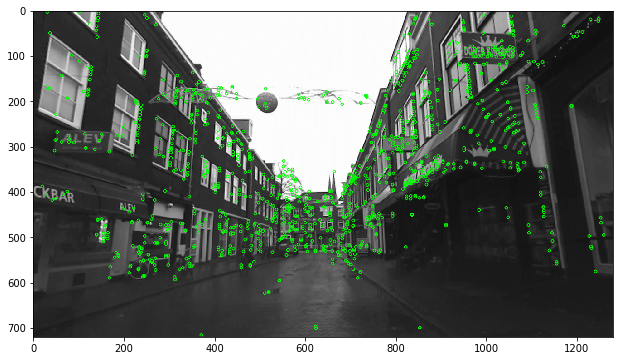

In [29]:
show(draw_frame(frame[1]))

btw seq.keyframes[0] is the same as frame[0]

In [ ]:
seq.keyframes[0] == frame[0]

To the keyframes we add the non-keyframes in their .frames property. Thus frame[1] is added as the first non keyframe after keyframes[0].

In [ ]:
seq.keyframes[0].frames[0] == frame[1]

We can use show2 to display two frames side-by-side. Every left frame can load it's corresponding right frame and you can request to return it using get_right_frame(). By default, right frames are not loaded unless needed, which is the case for keyframes to compute the depth of points.

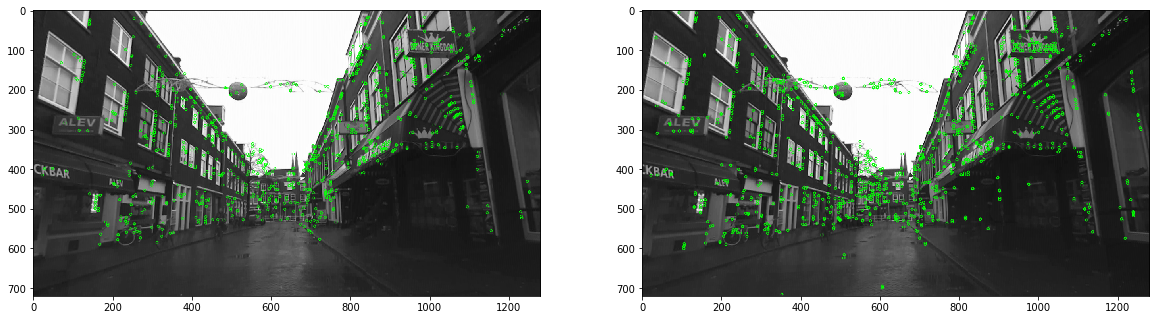

In [30]:
show2(draw_frame(seq.keyframes[0]), draw_frame(seq.keyframes[0].get_right_frame()))

You can also show the computed depth of observations. draw_frame_depth does not compute the depth but does show it if it has been computed. Alternatively you can use draw_observations() and draw_observations_depth() to show an image with a list of observations. This only makes sense if all observations belong to the same image. draw_frame_id() and draw_observations_id() show observations with their internal mappoint id to compare id's between images (did it map the same points).

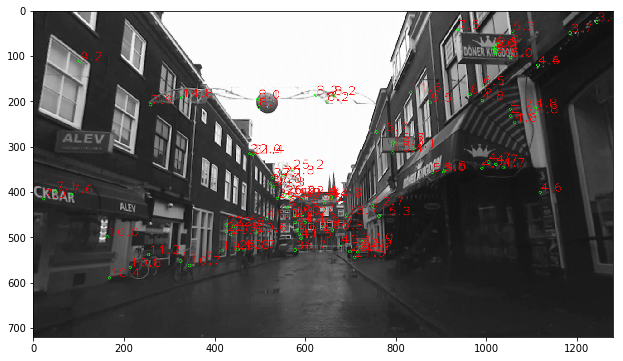

In [31]:
frame[0].compute_depth()
frame[0].filter_not_useful()
show(draw_observations_depth(frame[0].get_observations()[-100:]))

We can also manually compute the Depth of the points and show these

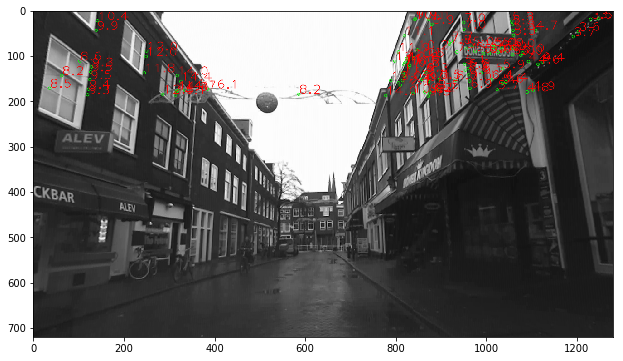

In [32]:
frame[1].compute_depth()
# filter out points that have no confident depth estimation and no binding to a mappoint
frame[1].filter_not_useful()
show(draw_observations_depth(frame[1].get_observations()[:100]))

In [33]:
cv_keyframes = get_covisible_keyframes(seq.keyframes[2])
mappoints = get_mappoints(cv_keyframes)
f_keyframes = get_fixed_keyframes(mappoints, cv_keyframes)

cv_keyframes_np = keyframes_to_np(cv_keyframes)
f_keyframes_np = keyframes_to_np(f_keyframes)
mappoints_np = mappoints_to_np(mappoints)
links_np = links_to_np(mappoints)

np.save('cv_keyframes', cv_keyframes_np)
np.save('f_keyframes', f_keyframes_np)
np.save('mappoints', mappoints_np)
np.save('links', links_np)